# Factor Analysis

## Q2

In [2]:
import pandas as pd
import numpy as np

In [10]:
# 2번
a = [0.789, 0.834, 0.74, 0.586, 0.676, 0.654, 0.641, 0.629, 0.564, 0.808]
data = pd.DataFrame(a, columns=['f1'])
data['f2'] = [-0.403, -0.234, -0.134, -0.185, -0.248, 0.44, 0.534, 0.651, 0.354, 0.714]
data

,f1,f2
0,0.789,-0.403
1,0.834,-0.234
2,0.740,-0.134
3,0.586,-0.185
4,0.676,-0.248
5,0.654,0.440
6,0.641,0.534
7,0.629,0.651
8,0.564,0.354
9,0.808,0.714


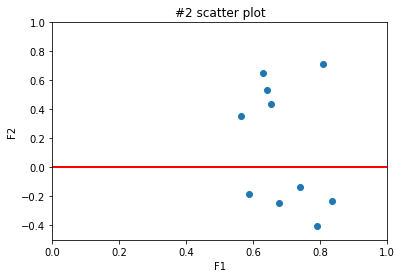

In [26]:
import matplotlib.pyplot as plt
plt.scatter(data['f1'], data['f2'])
plt.axis((0, 1, -0.5, 1))
plt.title('#2 scatter plot')
plt.axhline(y=0, color='r', linewidth=2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [30]:
from statsmodels.multivariate.factor_rotation import rotate_factors
L, t = rotate_factors(data.values,'varimax')

In [99]:
pd.DataFrame(L, columns=['f1', 'f2'] )  # varimax rotated 된 행렬 > negative가 사라짐

,f1,f2
0,0.873205,0.149812
1,0.808025,0.312101
2,0.672858,0.335885
3,0.580076,0.202811
4,0.689881,0.206262
5,0.260212,0.744047
6,0.193504,0.811538
7,0.113822,0.898046
8,0.239645,0.621275
9,0.219436,1.055702


In [32]:
t  # othogonal matrix (m의 역할)

array([[ 0.8008154 ,  0.59891125],
       [-0.59891125,  0.8008154 ]])

In [41]:
import math
p1 = (0.789,-0.403)
p2 = (0.87320459, 0.14981237)
math.degrees(math.atan2(0.87320459-0.789,0.403-0.14981237))

18.395981036486592

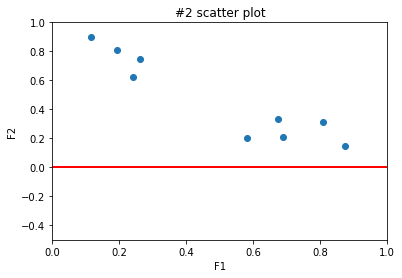

In [45]:
l_data = pd.DataFrame(L, columns=['f1', 'f2'])
plt.scatter(l_data['f1'], l_data['f2'])
plt.axis((0, 1, -0.5, 1))
plt.title('#2 scatter plot')
plt.axhline(y=0, color='r', linewidth=2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

## Q4

In [48]:
dt = pd.read_table('sales.dat', sep='\s+')
dt.head()

,X1,X2,X3,X4,X5,X6,X7
0,93.0,96.0,97.8,9,12,9,20
1,88.8,91.8,96.8,7,10,10,15
2,95.0,100.3,99.0,8,12,9,26
3,101.3,103.8,106.8,13,14,12,29
4,102.0,107.8,103.0,10,15,12,32


In [49]:
dt.shape

(50, 7)

In [102]:
corr = dt.corr()
corr   # 상관계수 행렬

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.926076,0.884002,0.572036,0.708074,0.674407,0.927312
X2,0.926076,1.000000,0.842523,0.541508,0.745910,0.465388,0.944296
X3,0.884002,0.842523,1.000000,0.700363,0.637471,0.641089,0.852568
X4,0.572036,0.541508,0.700363,1.000000,0.590736,0.146907,0.412639
X5,0.708074,0.745910,0.637471,0.590736,1.000000,0.385950,0.574553
X6,0.674407,0.465388,0.641089,0.146907,0.385950,1.000000,0.566372
X7,0.927312,0.944296,0.852568,0.412639,0.574553,0.566372,1.000000


In [53]:
# (a) 
!pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=db8f5da35e0ecf74167ffa5c34e9d02a366751bda6059f337503010ed9ddcbb8
  Stored in directory: c:\users\이다은\appdata\local\pip\cache\wheels\8d\9e\4c\fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [103]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation=None, method='ml')  # method : MLE
fa.fit(dt)
efa = pd.DataFrame(fa.loadings_, index=dt.columns)  # loadings
efa

,0,1
X1,0.695462,0.668687
X2,0.668684,0.694606
X3,0.795465,0.493887
X4,0.983381,-0.167255
X5,0.654960,0.312152
X6,0.249826,0.569168
X7,0.557796,0.812432


In [106]:
fa.loadings_.dot(fa.loadings_.T)

array([[0.93080929, 0.92951872, 0.88347177, 0.57206268, 0.66423218,
        0.55433935, 0.93118843],
       [0.92951872, 0.929617  , 0.87497264, 0.54139516, 0.65478492,
        0.56240225, 0.93730997],
       [0.88347177, 0.87497264, 0.87668988, 0.6996404 , 0.67516645,
        0.47983248, 0.84495734],
       [0.57206268, 0.54139516, 0.6996404 , 0.99501211, 0.59186648,
        0.15047765, 0.41264306],
       [0.66423218, 0.65478492, 0.67516645, 0.59186648, 0.52641225,
        0.34129307, 0.61893701],
       [0.55433935, 0.56240225, 0.47983248, 0.15047765, 0.34129307,
        0.38636501, 0.60176188],
       [0.93118843, 0.93730997, 0.84495734, 0.41264306, 0.61893701,
        0.60176188, 0.9711819 ]])

In [108]:
corr.values- fa.loadings_.dot(fa.loadings_.T)

array([[ 6.91907116e-02, -3.44293888e-03,  5.30501486e-04,
        -2.63858185e-05,  4.38416260e-02,  1.20067969e-01,
        -3.87685868e-03],
       [-3.44293888e-03,  7.03829997e-02, -3.24494118e-02,
         1.12868431e-04,  9.11248202e-02, -9.70142275e-02,
         6.98600305e-03],
       [ 5.30501486e-04, -3.24494118e-02,  1.23310124e-01,
         7.22631686e-04, -3.76952902e-02,  1.61256132e-01,
         7.61082260e-03],
       [-2.63858185e-05,  1.12868431e-04,  7.22631686e-04,
         4.98788867e-03, -1.13043038e-03, -3.57022337e-03,
        -3.61020201e-06],
       [ 4.38416260e-02,  9.11248202e-02, -3.76952902e-02,
        -1.13043038e-03,  4.73587752e-01,  4.46571389e-02,
        -4.43837467e-02],
       [ 1.20067969e-01, -9.70142275e-02,  1.61256132e-01,
        -3.57022337e-03,  4.46571389e-02,  6.13634994e-01,
        -3.53897307e-02],
       [-3.87685868e-03,  6.98600305e-03,  7.61082260e-03,
        -3.61020201e-06, -4.43837467e-02, -3.53897307e-02,
         2.8818096

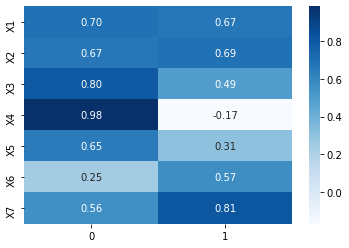

In [78]:
import seaborn as sns
sns.heatmap(efa, cmap='Blues', annot=True, fmt='.2f')  # lodings 

In [79]:
fa.get_communalities()   # communality : 공통핟

array([0.93080929, 0.929617  , 0.87668988, 0.99501211, 0.52641225,
       0.38636501, 0.9711819 ])

In [80]:
fa.get_factor_variance()  # commulative variance

(array([3.33313154, 2.2829559 ]),
 array([0.47616165, 0.32613656]),
 array([0.47616165, 0.8022982 ]))

In [81]:
fa.transform(dt)  # factor scores

array([[-0.69446457, -0.68141286],
       [-1.236005  , -0.83388622],
       [-0.83091801,  0.03670817],
       [ 0.42089738, -0.28026267],
       [-0.22622991,  0.50110996],
       [-0.4241712 , -0.63950867],
       [-0.61562602, -0.21323081],
       [ 1.92299548,  0.97251001],
       [-0.21799837,  0.50929109],
       [ 0.80860065,  0.56449271],
       [ 0.247734  ,  0.23407612],
       [-0.24753837,  0.37877057],
       [ 1.18986367, -0.28757083],
       [-0.69685391,  0.8283811 ],
       [ 0.43229284, -0.08344282],
       [-1.28272714, -1.0374573 ],
       [-0.0248397 ,  0.21234152],
       [ 0.04343762,  0.58966097],
       [-1.41898557,  1.05564128],
       [ 1.29658418, -1.17679046],
       [-0.55659709, -1.36970054],
       [-1.24933347,  2.10857769],
       [-0.79566705, -1.22519505],
       [ 0.32338795,  0.69603   ],
       [ 1.30540825,  0.35132036],
       [-0.41488451, -0.55896883],
       [ 0.82785503,  0.61135189],
       [ 0.00724787,  1.94299085],
       [-0.95727591,

In [70]:
## factor 3개일 때 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, rotation=None, method='ml')  # method : MLE
fa.fit(dt)
efa = pd.DataFrame(fa.loadings_, index=dt.columns)  # loadings
efa

,0,1,2
X1,0.900907,0.381379,-0.065919
X2,0.775087,0.600262,0.066672
X3,0.931382,0.201860,0.060450
X4,0.732921,-0.117818,0.666325
X5,0.688611,0.224777,0.169335
X6,0.757289,-0.131814,-0.635744
X7,0.761734,0.608315,-0.110473


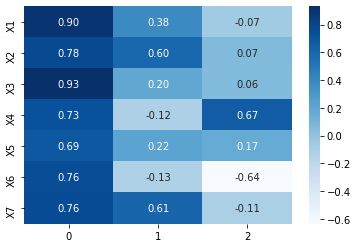

In [71]:
sns.heatmap(efa, cmap='Blues', annot=True, fmt='.2f')

In [110]:
fa.loadings_.dot(fa.loadings_.T)

array([[0.93080929, 0.92951872, 0.88347177, 0.57206268, 0.66423218,
        0.55433935, 0.93118843],
       [0.92951872, 0.929617  , 0.87497264, 0.54139516, 0.65478492,
        0.56240225, 0.93730997],
       [0.88347177, 0.87497264, 0.87668988, 0.6996404 , 0.67516645,
        0.47983248, 0.84495734],
       [0.57206268, 0.54139516, 0.6996404 , 0.99501211, 0.59186648,
        0.15047765, 0.41264306],
       [0.66423218, 0.65478492, 0.67516645, 0.59186648, 0.52641225,
        0.34129307, 0.61893701],
       [0.55433935, 0.56240225, 0.47983248, 0.15047765, 0.34129307,
        0.38636501, 0.60176188],
       [0.93118843, 0.93730997, 0.84495734, 0.41264306, 0.61893701,
        0.60176188, 0.9711819 ]])

In [72]:
fa.get_communalities()   # communality : 공통핟

array([0.96142891, 0.96551978, 0.91187482, 0.99504336, 0.55338332,
       0.99503169, 0.96248922])

In [73]:
fa.get_factor_variance()  # commulative variance

(array([4.44495002, 0.99833842, 0.90148265]),
 array([0.63499286, 0.14261977, 0.12878324]),
 array([0.63499286, 0.77761263, 0.90639587]))

In [76]:
fa.transform(dt)  # factor scores

array([[-9.33112375e-01, -3.62275258e-01,  1.11414219e-01],
       [-1.06961693e+00, -1.05077074e+00, -6.29789827e-01],
       [-9.57458509e-01,  4.56649352e-01, -9.42877152e-02],
       [ 6.20769031e-01, -9.22690657e-01, -1.52503031e-01],
       [ 2.61210621e-01, -1.62728344e-02, -7.53323419e-01],
       [-2.41618518e-01, -1.04883455e+00, -3.91691270e-01],
       [-8.34695972e-01,  1.96899017e-01,  1.04712047e-01],
       [ 2.48955641e+00, -4.10268637e-01, -2.26628067e-01],
       [ 5.25077000e-01, -3.71937182e-01, -1.10062779e+00],
       [ 7.30339466e-01,  8.54179085e-01,  3.90155943e-01],
       [ 5.62707192e-01, -2.04805214e-01, -3.52798174e-01],
       [-7.51996382e-01,  1.57871514e+00,  6.57625396e-01],
       [ 8.95462376e-01, -2.71002088e-01,  7.95429287e-01],
       [-2.93244978e-01,  5.82679686e-01, -8.07134007e-01],
       [-3.66122637e-01,  9.19274591e-01,  1.24026857e+00],
       [-2.38843681e+00,  6.96742599e-01,  1.13042030e+00],
       [ 1.09416636e-01,  1.78945262e-03